# This script is a coding interview that was targeted for 2 hours. I managed it in 2.5 hrs due to spending some extra time thinking of trying character n_gram featurizer for Part 2.

## As you can see from Problem 2, this is related to a drug discovery company that I was interviewing with

# Apparently my approach (for Part 2) was along the right lines and if I'd had the time to implement hyperparameter optimization via tpot genetic algorithms I would have achieved max performance on the data set. In particular, I would like to highlight my thought of leveraging the information in the Pokemon names to improve performance. Though I realize that my character n_gram featurizing code is unnecessarily clunky, it worked considering the time pressure I was under.

## Note that I've put together a quick 'pip freeze > requirements.txt' file. You could try running: 'pip install -r requirements.txt', but likely won't work since I remember having to do some finagling with installing XGBoost and a few others. Using this mainly as an example of some coding I've done. Judge as you will ;).

# Part 1: Python Coding

The goal of this assignment is to assess the applicant's coding skills in Python. We will be evaluating based on the following criteria, in order of importance: 

1. Correctness of the solution (i.e. does it pass the tests)
2. Readability of the solution (i.e. can we understand the logic behind your solution, is your code readable)
3. Execution speed (i.e. is your solution quite fast or really slow)
3. Efficient usage of Python builtins and libraries. (i.e. is your solution "pythonic")

**Task**: Please complete the functions that solve the following problems.

### Problem 1: Palindrome rearranging

Given a string, find out if its characters can be rearranged to form a palindrome.

**Example**

For `inputString = "aabb"`, the output should be
`palindromeRearranging(inputString) = true`.

We can rearrange `"aabb"` to make `"abba"`, which is a palindrome.

**Comments **

The function will be tested also on a larger list of test cases. Feel free to include any other test case in the tests below, if you want to test your algorithm against a case not included in the list.

In [1]:
def palindromeRearranging(inputString: str)->bool:
    if not inputString:  # base case; empty string
        return False
    result = {}
    for letter in inputString:
        result[letter] = result.get(letter,0) + 1
    modulo_vals = [val%2 == 0 for key,val in result.items()]
    if len(modulo_vals) - sum(modulo_vals) <= 1:
        return(True)
    else:
        return(False)

In [2]:
tests = ['', "aabb", "acab", "dkfhakc", "odkirteikrtod", "ccddd", "ccdddd", "cd", "eeeeeee", "tacocat", "-a--a"]
solutions = [False, True, False, False, True, True, True, False, True, True, True]

In [3]:
[palindromeRearranging(input_str) for input_str in tests] == solutions

True

In [4]:
for t, s in zip(tests, solutions):
    if palindromeRearranging(t) != s:
        print('Error in test %s' % t)
        break
else:
    print('All tests passed.')

All tests passed.


### Problem 2: Parsing virtual docking results

Under the directory `./files_to_parse` there are files containing results from a virtual docking experiment. In the experiment, several small molecules where docked with a target (protein) of interest, using a software called `Smina`. Within each output file, several results (modes) are provided per molecule, as a table in text format. For example, the file `example.txt`, contains:

```
[text we don't care about]

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
1       -5.4       0.000      0.000
2       -5.4       20.469     21.598
3       -5.4       5.526      7.144
4       -5.2       6.959      7.734
5       -5.2       2.251      2.985
6       -5.1       1.412      1.608
7       -4.9       2.079      2.810
8       -4.9       2.921      3.692
9       -4.8       6.995      8.018
```

To be able to analyze the results, we would like to parse these files and consolidate the results in a single, comma-separated value file with the following columns: `[filename, mode, affinity, rmsd_lb, rmsd_ub]`. For example, the entries for the `example.txt` file would be:

```
filename, mode, affinity, rmsd_lb, rmsd_ub
example.txt, 1, -5.4, 0.000, 0.000
example.txt, 2, -5.4, 20.469, 21.598  
example.txt, 3, -5.4, 5.526, 7.144 
example.txt, 4, -5.2, 6.959, 7.734
example.txt, 5, -5.2, 2.251, 2.985
example.txt, 6, -5.1, 1.412, 1.608
example.txt, 7, -4.9, 2.079, 2.810
example.txt, 8, -4.9, 2.921, 3.692
example.txt, 9, -4.8, 6.995, 8.018
```

Your tasks are to:
1. Write a python function that parses all the files in the directory `files_to_parse` and saves the data as a single CSV file named `parsed_data.csv`.

2. Plot the distribution of the minimum affinities across the different molecules (files). Does it match any standard statistical distribution?

3. In the file `data/important_molecules.txt` there is list of 20 molecules that are of particular importance in the analysis of the specific target. We have a hypothesis that the affinities of the different modes for each of the important molecules are drawn from the same distribution. Please test this hypothesis.

**Comments**
* Suggested libraries: `NumPy, SciPy, Pandas, Matplotlib, Seaborn`.

In [1]:
## required libraries
import os
import numpy as np
import scipy
import pandas as pd
import pylab
import matplotlib
import seaborn as sns
import itertools
from typing import Iterable
%matplotlib inline

In [2]:
os.getcwd()

'/Users/varunsharma/Downloads/deep-learning-assignment'

In [3]:
root_path = '.'
os.chdir(root_path)
filestp_dir = os.path.join(root_path,'files_to_parse')
dat_dir = os.path.join(root_path,'data')

### 1)

In [4]:
def pd_readinfile(dir_link, filename):  ## helper function for files_to_parse_func
    test_df = pd.read_csv(os.path.join(dir_link,filename), sep='\s+',
            skiprows=25, header=None
           )
    test_df.columns = ['mode', 'affinity', 'rmsd_lb', 'rmsd_ub']
    test_df['filename'] = filename#.split('.')[0]
    return(test_df)


def files_to_parse_func(dir_oi):  
    dfs_ls = []
    for i,filename in enumerate(os.listdir(dir_oi)):
        dfs_ls.append(pd_readinfile(dir_oi, filename))
    df_concat = pd.concat(dfs_ls, ignore_index=True)
    df_concat.to_csv(os.path.join(root_path, 'parsed_data.csv'), sep=',', index=False)
    return df_concat


df_concat = files_to_parse_func(dir_oi=filestp_dir)
print(df_concat.shape)
df_concat.head()

(1674, 5)


,mode,affinity,rmsd_lb,rmsd_ub,filename
0,1,-9.3,0.000,0.000,CHEMBL247200.txt
1,2,-9.3,1.158,1.325,CHEMBL247200.txt
2,3,-9.2,3.321,5.543,CHEMBL247200.txt
3,4,-8.9,1.693,1.951,CHEMBL247200.txt
4,5,-8.9,2.513,3.929,CHEMBL247200.txt


### 2) 

In [5]:
min_affins_perfile = [min(data['affinity']) for filename, data in df_concat.groupby('filename')]
len(min_affins_perfile) == len(os.listdir(filestp_dir)) # shows that gotten a min affinity value per read-in file

True

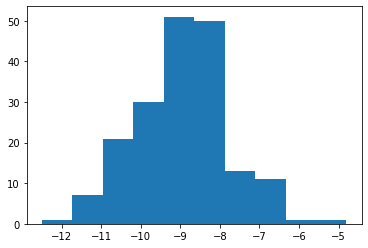

In [6]:
matplotlib.pyplot.hist(min_affins_perfile)
matplotlib.pyplot.show()

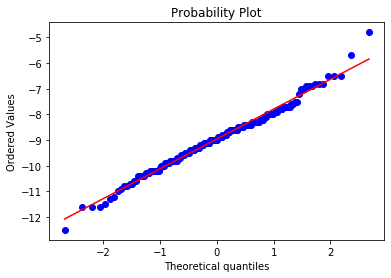

In [7]:
scipy.stats.probplot(min_affins_perfile, dist="norm", plot=pylab)
matplotlib.pyplot.show()

In [8]:
# normality test using Shapiro-Wilk test. there are other tests, but for sake of time just implemented this one.
# details https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

def is_normally_distributed(alpha : Iterable[float]) -> bool:
    stat, p = scipy.stats.shapiro(min_affins_perfile)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        return True
    return False
        
        
if is_normally_distributed(min_affins_perfile):
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


In [9]:
print('mean = %.3f; variance = %.3f'%(np.mean(min_affins_perfile), np.var(min_affins_perfile)))

mean = -8.959; variance = 1.340


#### Histogram representing distribution of the minimum affinities per file appears to be Gaussian in nature

### 3) Not sure if I interpreted the question correctly, but here's my attempt anyway

In [10]:
with open(os.path.join(dat_dir,'important_molecules.txt'),'r') as f1:
    imp_mols = [line.rstrip() for line in f1][:-1]
df_impmols = df_concat.loc[df_concat['filename'].isin(imp_mols)]
df_impmols.head()

,mode,affinity,rmsd_lb,rmsd_ub,filename
144,1,-9.6,0.000,0.000,CHEMBL249429.txt
145,2,-9.5,1.645,2.712,CHEMBL249429.txt
146,3,-9.5,3.687,9.464,CHEMBL249429.txt
147,4,-9.3,2.249,2.507,CHEMBL249429.txt
148,5,-9.2,3.676,10.305,CHEMBL249429.txt


## Checking whether distribution of the affinities per mode differ from each other with Kolmogorov-Smirnov 2 sample test
### itertools combinations used for mode distributions (e.g. Mode 1 vs. Mode 2: pval = 0.497)

In [11]:
combos = list(itertools.combinations(set(df_impmols['mode']), 2))
signif_diff_distr = []
for val1,val2 in combos:
    #print(val1,val2)
    pval = scipy.stats.ks_2samp(
        df_impmols.loc[df_impmols['mode'] == val1]['affinity'],
        df_impmols.loc[df_impmols['mode'] == val2]['affinity']
    ).pvalue
    print('Mode %i vs Mode %i: pval = %.3f'%(val1,val2,pval))
    if pval < 0.05/len(combos): # correction for multiple testing
        signif_diff_distr.append((val1,val2,pval))
        print('Mode %i, Mode %i have significantly different distributions; pval = %.3f'%(val1,val2,pval))
if len(signif_diff_distr) == 0:
    print('------------------------------------------------------------------------\n'
          'No Mode combinations had significantly different distributions according '
          'to Kolmogorov-Smirnov 2 sample test after\nBonferroni multiple testing correction')


Mode 1 vs Mode 2: pval = 0.571
Mode 1 vs Mode 3: pval = 0.571
Mode 1 vs Mode 4: pval = 0.175
Mode 1 vs Mode 5: pval = 0.175
Mode 1 vs Mode 6: pval = 0.081
Mode 1 vs Mode 7: pval = 0.034
Mode 1 vs Mode 8: pval = 0.012
Mode 1 vs Mode 9: pval = 0.012
Mode 2 vs Mode 3: pval = 0.983
Mode 2 vs Mode 4: pval = 0.571
Mode 2 vs Mode 5: pval = 0.571
Mode 2 vs Mode 6: pval = 0.571
Mode 2 vs Mode 7: pval = 0.571
Mode 2 vs Mode 8: pval = 0.336
Mode 2 vs Mode 9: pval = 0.034
Mode 3 vs Mode 4: pval = 0.832
Mode 3 vs Mode 5: pval = 0.832
Mode 3 vs Mode 6: pval = 0.571
Mode 3 vs Mode 7: pval = 0.571
Mode 3 vs Mode 8: pval = 0.336
Mode 3 vs Mode 9: pval = 0.081
Mode 4 vs Mode 5: pval = 1.000
Mode 4 vs Mode 6: pval = 0.983
Mode 4 vs Mode 7: pval = 0.832
Mode 4 vs Mode 8: pval = 0.571
Mode 4 vs Mode 9: pval = 0.175
Mode 5 vs Mode 6: pval = 1.000
Mode 5 vs Mode 7: pval = 0.832
Mode 5 vs Mode 8: pval = 0.571
Mode 5 vs Mode 9: pval = 0.175
Mode 6 vs Mode 7: pval = 1.000
Mode 6 vs Mode 8: pval = 0.983
Mode 6 v

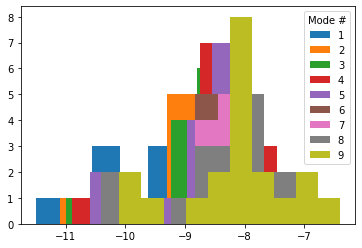

In [12]:
## Histogram of the affinities for each mode for the important molecules
for mode, df in df_impmols.groupby('mode'):
    matplotlib.pyplot.hist(df['affinity'],label=mode)
#     sns.kdeplot(df, 'affinity')
    matplotlib.pyplot.legend(title='Mode #')

# Part 2: Machine Learning 

The goal of this assignment is to assess the applicant's expertise in solving problems with machine learning using Python. We will be evaluating the solutions by the following criteria (all equally important):

* Data selection/preprocessing and train/test split sanity
* Model evaluation pipeline. We are not looking for a _correct_ model, rather than a sound evaluation of different models or parameter combinations.
* Explanation of the reasons behind the final model selection.
* Model accuracy on a held-out test set. The test set data are held out by us and not provided, so feel free to use all available data for training/validation.  



### Problem 1: Pokemon Type Classification

Unlike the popular game series typical quest to catch them all, here your objective is to predict the type of the pokemon based on its stats. 

**Data**: In the file `data/Pokemon.csv`, you can find the relevant data for 634 Pokemon. 
The column to be used as an output, is `Type 1`. You can use any combination of the other columns as an input.

**Evaluation**: Your model will be evaluated on the multi-class classification problem of predicting the `Type 1` label.  


In [219]:
import sklearn
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score ### equivalent to jaccard score for multi class classification- useful here
from sklearn.utils import class_weight
import matplotlib.pylab as plt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

RANDOM_STATE = 0

# Models tested:
## Logistic Regression, Decision Tree, Random Forest, SVM (linear kernel), KNN, MLP, XGBoost

In [220]:
poke_df = pd.read_csv(os.path.join(dat_dir,'pokemon.csv'),sep = ',').set_index('Name')
poke_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False


In [221]:
print('%i NA values in Type 2 feature out of %i total rows'%(poke_df['Type 2'].isna().sum(),poke_df.shape[0]))

298 NA values in Type 2 feature out of 634 total rows


In [222]:
#### Value counts per class show that the data set is highly inbalanced
#### hence its important to use both precision and recall metrics, therefore weighted f1 scores or jaccard score
#### is appropriate metric when assessing performance. 
poke_df['Type 1'].value_counts()

Water       81
Normal      74
Grass       57
Bug         55
Psychic     46
Fire        38
Electric    35
Rock        34
Dark        31
Dragon      29
Ghost       28
Steel       27
Ground      24
Ice         22
Fighting    20
Fairy       15
Poison      14
Flying       4
Name: Type 1, dtype: int64

In [223]:
### If we used the most frequent class value proportion to rest of data set as baseline, this is the score:
81/sum(poke_df['Type 1'].value_counts())

0.1277602523659306

In [224]:
## Class weights, may help performance on held out test set.
types_weight = class_weight.compute_class_weight('balanced',np.unique(poke_df['Type 1']),poke_df['Type 1'])
types_weight_dict = dict(zip(np.unique(poke_df['Type 1']),types_weight))
for key in list(types_weight_dict.keys()):
    types_weight_dict[type1_map[key]] = types_weight_dict.pop(key)
types_weight_dict

{1: 0.6404040404040404,
 9: 1.136200716845878,
 12: 1.21455938697318,
 13: 1.0063492063492063,
 16: 2.348148148148148,
 11: 1.761111111111111,
 17: 0.9269005847953217,
 14: 8.805555555555555,
 15: 1.257936507936508,
 8: 0.6179337231968811,
 10: 1.4675925925925926,
 5: 1.601010101010101,
 7: 0.47597597597597596,
 4: 2.515873015873016,
 2: 0.7657004830917874,
 6: 1.0359477124183007,
 3: 1.3045267489711934,
 0: 0.4348422496570645}

In [226]:
### Convert string/factor variables into dummies
poke_df_proc = poke_df.copy(deep=True)
# poke_df_proc = poke_df_proc.dropna() ## dropping NAs does not seem to improve the correlation with Type 1
## helper functions for dummying the categorical variables
nonint_to_int_dict = lambda x: dict(zip(set(x), range(len(set(x)))))
mapping = lambda x: x.replace(nonint_to_int_dict(x))

type1_map = nonint_to_int_dict(poke_df_proc['Type 1'])
type2_map = nonint_to_int_dict(poke_df_proc['Type 2'])
legendary_map = nonint_to_int_dict(poke_df_proc['Legendary'])
poke_df_proc[['Type 1','Type 2','Legendary']] = poke_df_proc[['Type 1','Type 2','Legendary']].apply(mapping,axis=0)
poke_df_proc

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Chikorita,8,0,318,45,49,65,49,65,45,2,0
Bayleef,8,0,405,60,62,80,63,80,60,2,0
Meganium,8,0,525,80,82,100,83,100,80,2,0
Cyndaquil,17,0,309,39,52,43,60,50,65,2,0
Quilava,17,0,405,58,64,58,80,65,80,2,0
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,6,17,600,50,100,150,100,150,50,6,1
DiancieMega Diancie,6,17,700,50,160,110,160,110,110,6,1
HoopaHoopa Confined,2,16,600,80,110,60,150,130,70,6,1


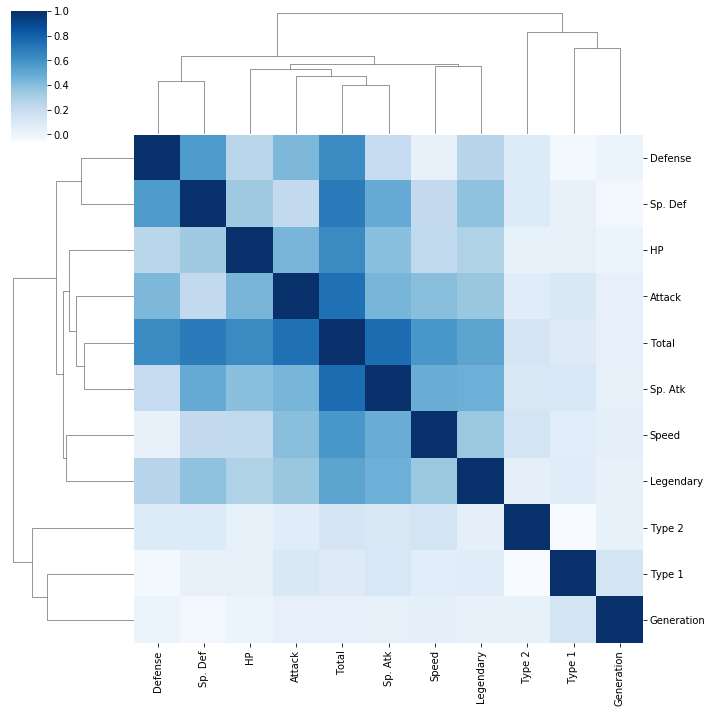

In [227]:
# calculate the correlation matrix
corr = poke_df_proc.corr()

# plot the heatmap
g = sns.clustermap(corr, 
                   xticklabels=corr.columns,
                   yticklabels=corr.columns,
                   cmap='Blues'
                  )
from matplotlib.patches import Rectangle
ax = g.ax_heatmap

# ax.add_patch(Rectangle(
#     (np.flatnonzero(g.data2d.index == 'Type 1'), np.flatnonzero(g.data2d.index == 'Type 1')
#     ), -10, 1, fill=False, edgecolor='red', lw=0.5))
plt.show()
#sns.clustermap(poke_df_rm_proc,cmap='Blues')

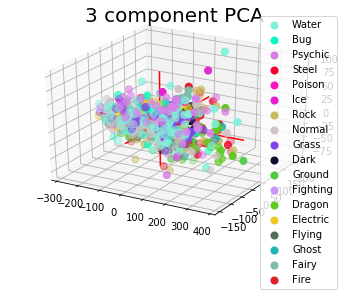

In [228]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(poke_df_proc)
principalDf = pd.DataFrame(data = principalComponents
                           ,columns = ['PC1', 'PC2','PC3']
                          )

finalDf = pd.concat([principalDf, poke_df['Type 1'].reset_index(drop=True)], axis = 1)

len(set(finalDf['Type 1']))
import random

number_of_colors = len(set(finalDf['Type 1']))

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

#fig = matplotlib.pyplot.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = set(finalDf['Type 1'])
#colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type 1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['PC1']), max(finalDf['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['PC2']), max(finalDf['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['PC3']), max(finalDf['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

### PCA plot doesn't show clear separation of the classes
### Would normally try t-SNE, but due to time constraints,
### I don't want to worry about the tuning required for that approach

In [229]:
### Split data into feature and outcome set
# X -> features, y -> outcome
X = poke_df_proc.drop('Type 1',axis=1)
y = poke_df_proc['Type 1']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.3) 

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [230]:
## Attempt at oversampling to potentially help performance on held out test set
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority',k_neighbors=2) #SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_sm.shape,y_train.shape)

(443, 10) (443,)
(501, 10) (443,)


## Models:
Attempted logistic regression, decision tree, random forest, SVM, XGBoost, simple MLP

things to try in future:
- incremental feature contribution
- tpot for automated machine learning
- autokeras for automated deep learning
- evolutionary algorithm (also for hyperparameter tuning)

### Logistic regression
training a LogisticRegression

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Logistic Regression mean and std scores are: (0.183, 0.053)
Accuracy of random search on test set: 0.188


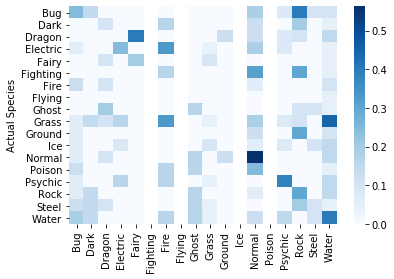

In [231]:
from sklearn.linear_model import LogisticRegression
## 5-fold CV scores
lr = LogisticRegression(random_state=RANDOM_STATE)
lr_scores = cross_val_score(lr, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Logistic Regression mean and std scores are: (%.3f, %.3f)"%(lr_scores.mean(), lr_scores.std()))

## Training/Testing split accuracy
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_fit = lr_model.fit(X_train, y_train) 
lr_predictions = lr_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(lr_predictions)

lr_score = lr_model.score(X_test,y_test)
print("Accuracy of random search on test set: %.3f"%(lr_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

Training a LogisticRegression model as Baseline with oversampling lowest frequent class

5-fold CV: Logistic Regression mean and std scores are: (0.272, 0.048)
Accuracy of logistic regression on test set: 0.157


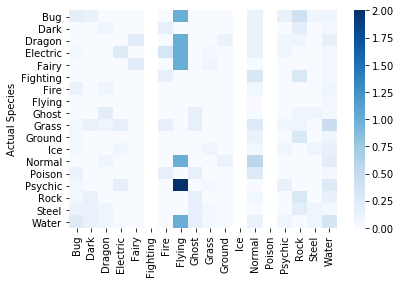

In [232]:
from sklearn.linear_model import LogisticRegression
## 5-fold CV scores
lr = LogisticRegression(random_state=RANDOM_STATE)
lr_scores = cross_val_score(lr, X=X_sm, y=y_sm, cv=5, scoring="f1_weighted")
print("5-fold CV: Logistic Regression mean and std scores are: (%.3f, %.3f)"%(lr_scores.mean(), lr_scores.std()))

## training/Testing split accuracy
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_fit = lr_model.fit(X_sm, y_sm) 
lr_predictions = lr_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(lr_predictions)

lr_oversmple_score = lr_model.score(X_test,y_test)
print("Accuracy of logistic regression on test set: %.3f"%(lr_oversmple_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### Oversampling seems to reduce accuracy on test set with logistic regression, so sticking with normal data set

### Decision Tree

5-fold CV: Decision Tree mean and std scores are: (0.185, 0.011)
Accuracy of decision tree on test set: 0.120


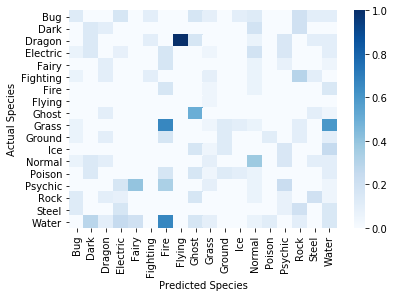

In [233]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
### 5-fold cv f1 score
dt = DecisionTreeClassifier(max_depth = 1000,random_state=RANDOM_STATE)
dt_scores = cross_val_score(dt, X=X_train, y=y_train, cv=3, scoring="f1_weighted")
print("5-fold CV: Decision Tree mean and std scores are: (%.3f, %.3f)"%(dt_scores.mean(), dt_scores.std()))

### Train-test split for confusion matrix
dtree_model = DecisionTreeClassifier(max_depth = 1000,random_state=RANDOM_STATE).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(dtree_predictions)

dt_score = dtree_model.score(X_test,y_test)
print("Accuracy of decision tree on test set: %.3f"%(dt_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### Random Forest:
Random Forest with manually specified parameters for max_depth and n_estimators

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Random Forest mean and std scores are: (0.249, 0.033)
Accuracy of Manual parameters on test set: 0.209


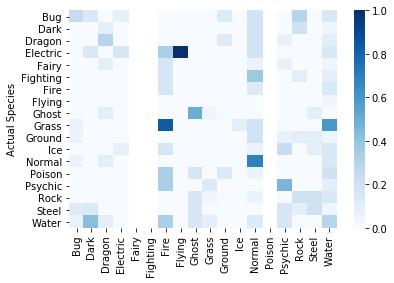

In [234]:
# training a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
## 5-fold CV scores
rf = RandomForestClassifier(max_depth = 100,n_estimators=1000,random_state=RANDOM_STATE)
rf_scores = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Random Forest mean and std scores are: (%.3f, %.3f)"%(rf_scores.mean(), rf_scores.std()))

## Training/Testing split accuracy
rf_model = RandomForestClassifier(max_depth = 100,n_estimators=1000,random_state=RANDOM_STATE)
rf_fit = rf_model.fit(X_train, y_train) 
rf_predictions = rf_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(rf_predictions)

rf_man_score = rf_model.score(X_test,y_test)
print("Accuracy of Manual parameters on test set: %.3f"%(rf_man_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

Random Search hyperparameter optimization since RF model seems to perform decently in comparison to base

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.6min finished


Accuracy of best random search hyperparameters on test set: 0.194


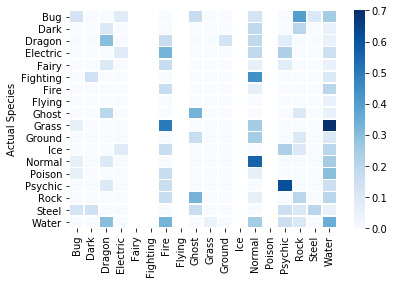

In [235]:
## inspired by https://pierpaolo28.github.io/blog/blog25/
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 5, verbose= 5, random_state=RANDOM_STATE, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
rf_rand_score = accuracy_score(y_test,predictionforest)
print("Accuracy of best random search hyperparameters on test set: %.3f"%(rf_rand_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

Grid Search hyperparameter optimization since RF model seems to perform decently in comparison to base

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  2.7min finished


Accuracy of best grid search hyperparameters on test set: 0.204


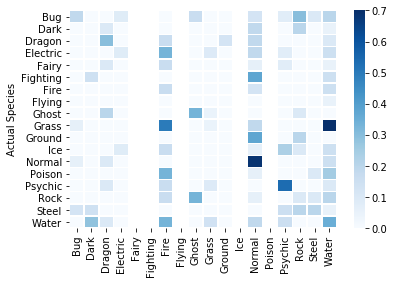

In [238]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, 
                     model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, 
                     model.best_params_['n_estimators'] + 150]
}

clf = RandomForestClassifier(random_state=RANDOM_STATE)
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)

model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
rf_grid_score = accuracy_score(y_test,predictionforest)
print("Accuracy of best grid search hyperparameters on test set: %.3f"%(rf_grid_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

Bayesian hyperparameter optimization since RF model seems to perform decently in comparison to base

In [239]:
# training a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

class HyperparamOptim:
    
    def __init__(self, model_gen, space):  ## pass in generic model
        self.model = model_gen
        self.space = space
        self.trials = Trials()
    
    def objective(self, space):
        mdl = self.model(**space,random_state=RANDOM_STATE)  ## instance of generic model executed with parameters stored in dictionary
        accuracy = cross_val_score(mdl, X_train, y_train, cv=5).mean()

        # We aim to maximize accuracy, therefore we return it as a negative value
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    def run(self):
        space = self.space
        trials = self.trials
        self.best = fmin(fn=self.objective,
                         space=space,
                         algo=tpe.suggest,
                         max_evals=80,
                         trials=trials)
        return(self.best)


space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
        }

model_gen = RandomForestClassifier
rf_hyperparam_optim = HyperparamOptim(model_gen,space)
best = rf_hyperparam_optim.run()

  0%|          | 0/80 [00:00<?, ?trial/s, best loss=?]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



  1%|▏         | 1/80 [00:02<03:32,  2.69s/trial, best loss: -0.1376915219611849]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



  4%|▍         | 3/80 [00:03<01:58,  1.54s/trial, best loss: -0.1466802860061287]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



  5%|▌         | 4/80 [00:10<04:04,  3.21s/trial, best loss: -0.1466802860061287]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



  6%|▋         | 5/80 [00:22<07:06,  5.69s/trial, best loss: -0.1466802860061287]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



  8%|▊         | 6/80 [00:33<09:08,  7.42s/trial, best loss: -0.1466802860061287]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 10%|█         | 8/80 [00:36<04:59,  4.15s/trial, best loss: -0.1670837589376915]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 11%|█▏        | 9/80 [00:39<04:33,  3.86s/trial, best loss: -0.18283963227783456]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 14%|█▍        | 11/80 [00:42<02:57,  2.57s/trial, best loss: -0.18283963227783456]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 15%|█▌        | 12/80 [00:50<04:46,  4.22s/trial, best loss: -0.18733401430030644]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 18%|█▊        | 14/80 [00:53<02:57,  2.69s/trial, best loss: -0.18733401430030644]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 19%|█▉        | 15/80 [01:04<05:35,  5.16s/trial, best loss: -0.18733401430030644]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 20%|██        | 16/80 [01:04<04:02,  3.79s/trial, best loss: -0.18733401430030644]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 21%|██▏       | 17/80 [01:05<03:04,  2.93s/trial, best loss: -0.21902451481103163]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 22%|██▎       | 18/80 [01:06<02:16,  2.20s/trial, best loss: -0.21902451481103163]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 24%|██▍       | 19/80 [01:18<05:08,  5.06s/trial, best loss: -0.21902451481103163]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 25%|██▌       | 20/80 [01:20<04:16,  4.27s/trial, best loss: -0.21902451481103163]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 26%|██▋       | 21/80 [01:30<05:45,  5.85s/trial, best loss: -0.2574055158324821] 

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 28%|██▊       | 22/80 [01:36<05:49,  6.03s/trial, best loss: -0.2574055158324821]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 29%|██▉       | 23/80 [01:37<04:09,  4.38s/trial, best loss: -0.2574055158324821]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 30%|███       | 24/80 [01:44<04:56,  5.30s/trial, best loss: -0.2574055158324821]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 31%|███▏      | 25/80 [01:50<05:05,  5.56s/trial, best loss: -0.2574055158324821]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 32%|███▎      | 26/80 [01:57<05:25,  6.03s/trial, best loss: -0.2574055158324821]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 34%|███▍      | 27/80 [02:08<06:33,  7.42s/trial, best loss: -0.2596016343207354]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 35%|███▌      | 28/80 [02:18<07:00,  8.08s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 36%|███▋      | 29/80 [02:26<06:58,  8.20s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 38%|███▊      | 30/80 [02:33<06:30,  7.81s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 39%|███▉      | 31/80 [02:39<06:02,  7.39s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 40%|████      | 32/80 [02:45<05:33,  6.95s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 41%|████▏     | 33/80 [02:51<05:11,  6.63s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 44%|████▍     | 35/80 [02:58<03:32,  4.72s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 45%|████▌     | 36/80 [03:08<04:32,  6.18s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 46%|████▋     | 37/80 [03:15<04:34,  6.39s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 48%|████▊     | 38/80 [03:21<04:25,  6.32s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 50%|█████     | 40/80 [03:31<03:30,  5.26s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 51%|█████▏    | 41/80 [03:34<02:59,  4.60s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 52%|█████▎    | 42/80 [03:40<03:11,  5.05s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 55%|█████▌    | 44/80 [03:41<01:33,  2.61s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 56%|█████▋    | 45/80 [03:43<01:31,  2.60s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 57%|█████▊    | 46/80 [03:50<02:07,  3.75s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 59%|█████▉    | 47/80 [03:59<02:55,  5.33s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 60%|██████    | 48/80 [04:05<02:55,  5.47s/trial, best loss: -0.25962717058222673]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 61%|██████▏   | 49/80 [04:06<02:08,  4.16s/trial, best loss: -0.2731613891726251] 

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 62%|██████▎   | 50/80 [04:06<01:31,  3.06s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 64%|██████▍   | 51/80 [04:07<01:06,  2.28s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 65%|██████▌   | 52/80 [04:07<00:48,  1.73s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 66%|██████▋   | 53/80 [04:07<00:36,  1.35s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 68%|██████▊   | 54/80 [04:08<00:29,  1.13s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 69%|██████▉   | 55/80 [04:09<00:23,  1.07trial/s, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 71%|███████▏  | 57/80 [04:11<00:22,  1.00trial/s, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 72%|███████▎  | 58/80 [04:12<00:19,  1.15trial/s, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 74%|███████▍  | 59/80 [04:21<01:09,  3.30s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 75%|███████▌  | 60/80 [04:21<00:48,  2.45s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 78%|███████▊  | 62/80 [04:24<00:31,  1.76s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 79%|███████▉  | 63/80 [04:24<00:23,  1.36s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 80%|████████  | 64/80 [04:34<01:00,  3.78s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 81%|████████▏ | 65/80 [04:34<00:41,  2.78s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 82%|████████▎ | 66/80 [04:43<01:06,  4.76s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 84%|████████▍ | 67/80 [04:53<01:22,  6.36s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 85%|████████▌ | 68/80 [05:00<01:17,  6.46s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 86%|████████▋ | 69/80 [05:09<01:18,  7.13s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 88%|████████▊ | 70/80 [05:17<01:13,  7.35s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 89%|████████▉ | 71/80 [05:24<01:07,  7.45s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 90%|█████████ | 72/80 [05:31<00:56,  7.10s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 91%|█████████▏| 73/80 [05:33<00:40,  5.72s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 94%|█████████▍| 75/80 [05:40<00:21,  4.28s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 95%|█████████▌| 76/80 [19:42<17:02, 255.50s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 96%|█████████▋| 77/80 [19:50<09:04, 181.44s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 98%|█████████▊| 78/80 [19:51<04:14, 127.16s/trial, best loss: -0.2731613891726251]

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 99%|█████████▉| 79/80 [19:58<01:31, 91.14s/trial, best loss: -0.2731613891726251] 

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



100%|██████████| 80/80 [20:01<00:00, 15.02s/trial, best loss: -0.2731613891726251]


Accuracy of best Bayesian optimized hyperparameters on test set: 0.199


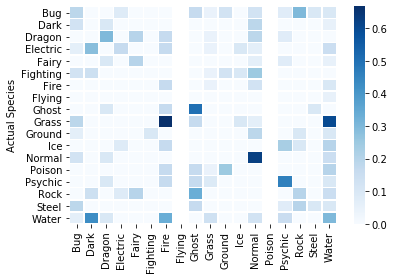

In [240]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']],
                                       random_state=RANDOM_STATE
                                      ).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
rf_bayes_score = accuracy_score(y_test,predictionforest)
print("Accuracy of best Bayesian optimized hyperparameters on test set: %.3f"%(rf_bayes_score))

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

### SVM linear kernel
default parameters

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Support Vector Machine mean and std scores are: (0.193, 0.022)
Accuracy of decision tree on test set: 0.178


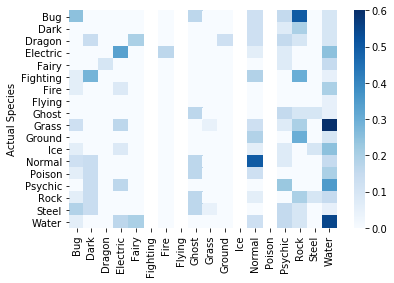

In [241]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear',random_state=RANDOM_STATE).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(svm_predictions)

svm = SVC(kernel = 'linear',random_state=RANDOM_STATE)
svm_scores = cross_val_score(svm, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Support Vector Machine mean and std scores are: (%.3f, %.3f)"%(svm_scores.mean(), svm_scores.std()))

# model accuracy for X_test   
svm_lin_score = svm_model_linear.score(X_test, y_test)
print("Accuracy of decision tree on test set: %.3f"%(svm_lin_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

random search hyperparameter optimization

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished


Accuracy of random search on test set: 0.194


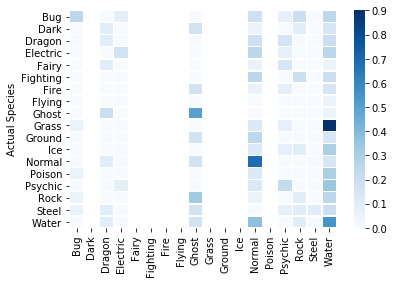

In [242]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

random_search = {
    'C': sp_rand(),
    'degree': sp_rand(),
    'kernel': ['rbf','linear']
}

clf = SVC()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 5, verbose= 5, random_state= RANDOM_STATE, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
svm_rand_score = accuracy_score(y_test,predictionforest)
print("Accuracy of random search on test set: %.3f"%(svm_rand_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

grid search hyperparameter optimization

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished


Accuracy of grid search on test set: 0.230


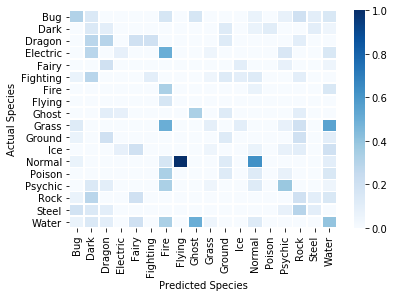

In [243]:
from sklearn.model_selection import GridSearchCV

grid_search = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']
              }


clf = SVC(RANDOM_STATE)
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)

model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
svm_grid_score = accuracy_score(y_test,predictionforest)
print("Accuracy of grid search on test set: %.3f"%(svm_grid_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

### Simple Multi-Layer Perceptron

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Support Vector Machine mean and std scores are: (0.218, 0.025)
Accuracy of multi-layer perceptron on test set: 0.215


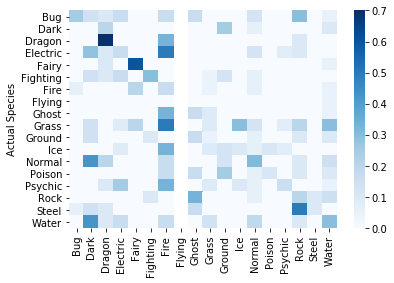

In [244]:
# training a simple Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
hid_layer = (200,100,50,100,200)
activ_func = 'tanh'
solver = 'lbfgs'
iter_n = 300
mlp_model = MLPClassifier(hidden_layer_sizes=hid_layer,
                          max_iter=iter_n,
                          activation = activ_func,
                          solver=solver,
                          random_state=RANDOM_STATE).fit(X_train, y_train) 
mlp_predictions = mlp_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(mlp_predictions)

mlp = MLPClassifier(hidden_layer_sizes=hid_layer,
                    max_iter=iter_n,
                    activation = activ_func,
                    solver=solver,
                    random_state=RANDOM_STATE)
mlp_scores = cross_val_score(mlp, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Support Vector Machine mean and std scores are: (%.3f, %.3f)"%(mlp_scores.mean(), mlp_scores.std()))

# model accuracy for X_test   
mlp_score = mlp_model.score(X_test, y_test)
print("Accuracy of multi-layer perceptron on test set: %.3f"%(mlp_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### XGB classifier

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Gradient Boosting mean and std scores are: (0.210, 0.035)
Accuracy of Gradient Boosting on test set: 0.204


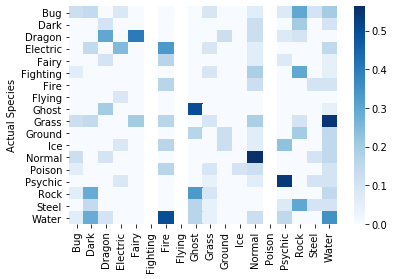

In [245]:
# training a simple XGB classifier
from xgboost import XGBClassifier ## after !pip install xgboost in jupyter notebook
xgb_model = XGBClassifier(random_state=RANDOM_STATE).fit(X_train, y_train) 
xgb_predictions = xgb_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(xgb_predictions)

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb_scores = cross_val_score(xgb, X=X_train, y=y_train, cv=5, scoring="f1_weighted")

print("5-fold CV: Gradient Boosting mean and std scores are: (%.3f, %.3f)"%(xgb_scores.mean(), xgb_scores.std()))

# model accuracy for X_test   
xgb_score = xgb_model.score(X_test, y_test)
print("Accuracy of Gradient Boosting on test set: %.3f"%(xgb_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

## All test scores compared:

In [247]:
print('Logistic Regression- no oversampling: %.3f'%(lr_score))
print('Logistic Regression- oversampling: %.3f'%(lr_oversmple_score))
print('Decision tree- %.3f'%(dt_score))
print('Random Forest- manual: %.3f'%(rf_man_score))
print('Random Forest- random search: %.3f'%(rf_rand_score))
print('Random Forest- grid search: %.3f'%(rf_grid_score))
print('Random Forest- bayesian optimization: %.3f'%(rf_bayes_score))
print('SVM- linear default: %.3f'%(svm_lin_score))
print('SVM- random search: %.3f'%(svm_rand_score))
print('SVM- grid search: %.3f'%(svm_grid_score))
print('Multi Layer Perceptron- manual: %.3f'%(mlp_score))
print('Gradient Boost- default: %.3f'%(xgb_score))

Logistic Regression- no oversampling: 0.188
Logistic Regression- oversampling: 0.157
Decision tree- 0.120
Random Forest- manual: 0.209
Random Forest- random search: 0.194
Random Forest- grid search: 0.204
Random Forest- bayesian optimization: 0.199
SVM- linear default: 0.178
SVM- random search: 0.194
SVM- grid search: 0.230
Multi Layer Perceptron- manual: 0.215
Gradient Boost- default: 0.204


### As a result, it appears that the SVM- grid search algorithm performs best on the test set

# Feature engineering to create most frequent character n-grams and include as features

In [248]:
import sklearn
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score ### equivalent to jaccard score for multi class classification- useful here
from sklearn.utils import class_weight
import matplotlib.pylab as plt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

RANDOM_STATE = 0

# Models tested:
## Logistic Regression, Decision Tree, Random Forest, SVM, MLP, XGBoost

In [249]:
poke_df = pd.read_csv(os.path.join(dat_dir,'pokemon.csv'),sep = ',').set_index('Name')
poke_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False
Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,False
Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False
Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False
Quilava,Fire,NaN,405,58,64,58,80,65,80,2,False


In [250]:
### If we used the most frequent class value proportion to rest of data set as baseline, this is the score:
81/sum(poke_df['Type 1'].value_counts())

0.1277602523659306

### Optional approach to extract character n-grams from names of the pokemon and use as features
### can run this on held out test set to obtain those features as well

In [251]:
class add_chr_ngram_features(object):
    def __init__(self,poke_df):
        import collections
        char_ngram_dict = {key:[] for key in list(set(poke_df['Type 1']))}
        for txt in list(poke_df.index):
            char_ngram_dict.get(poke_df.loc[txt]['Type 1']).append(self.word2ngrams(txt,n=3))
        for key in char_ngram_dict:
            char_ngram_dict[key] = collections.Counter(
                [subls for ls in char_ngram_dict[key] for subls in ls]
            )
        self.char_ngram_dict = char_ngram_dict
        char_ngram_ls = list(set([subls for txt in poke_df.index for subls in self.word2ngrams(txt,3)]))
        self.char_ngram_ls = char_ngram_ls
        ### Delete ngrams that have less than 3 counts for that type
        from itertools import dropwhile
        for poke_type1,dict_oi in char_ngram_dict.items():
            for key, count in dropwhile(lambda key_count: key_count[1] >= 3, dict_oi.most_common()):
                del dict_oi[key]

        ngrams_to_keep = list(set(
            [subls for poke_type1 in char_ngram_dict for subls in list(char_ngram_dict[poke_type1].keys())]
        ))
        self.ngrams_to_keep = ngrams_to_keep
        ngram_count_final_dict = {}
        for ngram in ngrams_to_keep:
            ngram_count_final_dict[ngram] = list(map(int,list(map(lambda x:ngram in x,poke_df.index.values))))
        self.ngram_count_final_dict = ngram_count_final_dict
        ngram_count_final_df = pd.DataFrame(ngram_count_final_dict,index=poke_df.index)
        self.ngram_count_final_df = ngram_count_final_df
        poke_df_new = pd.concat([poke_df,ngram_count_final_df],axis=1)
        self.poke_df = poke_df_new
    def word2ngrams(self,text, n=3):
        """ Convert text into character ngrams. """
        return ["".join(j) for j in zip(*[text[i:] for i in range(n)])]
    def convert(self):
        return(self.poke_df)

add_chr = add_chr_ngram_features(poke_df)
poke_df = add_chr.convert()
poke_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,abl,ame,tri,nce,Kyu,azi,ish,don,Fo,ump
Name,,,,,,,,,,,,,,,,,,,,,
Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,...,0,0,0,0,0,0,0,0,0,0
Bayleef,Grass,NaN,405,60,62,80,63,80,60,2,...,0,0,0,0,0,0,0,0,0,0
Meganium,Grass,NaN,525,80,82,100,83,100,80,2,...,0,0,0,0,0,0,0,0,0,0
Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,...,0,0,0,0,0,0,0,0,0,0
Quilava,Fire,NaN,405,58,64,58,80,65,80,2,...,0,0,0,0,0,0,0,0,0,0


In [252]:
### Convert string/factor variables into dummies
poke_df_proc = poke_df.copy(deep=True)
# poke_df_proc = poke_df_proc.dropna() ## dropping NAs does not seem to improve the correlation with Type 1
## helper functions for dummying the categorical variables
nonint_to_int_dict = lambda x: dict(zip(set(x), range(len(set(x)))))
mapping = lambda x: x.replace(nonint_to_int_dict(x))

type1_map = nonint_to_int_dict(poke_df_proc['Type 1'])
type2_map = nonint_to_int_dict(poke_df_proc['Type 2'])
legendary_map = nonint_to_int_dict(poke_df_proc['Legendary'])
poke_df_proc[['Type 1','Type 2','Legendary']] = poke_df_proc[['Type 1','Type 2','Legendary']].apply(mapping,axis=0)
poke_df_proc

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,abl,ame,tri,nce,Kyu,azi,ish,don,Fo,ump
Name,,,,,,,,,,,,,,,,,,,,,
Chikorita,8,0,318,45,49,65,49,65,45,2,...,0,0,0,0,0,0,0,0,0,0
Bayleef,8,0,405,60,62,80,63,80,60,2,...,0,0,0,0,0,0,0,0,0,0
Meganium,8,0,525,80,82,100,83,100,80,2,...,0,0,0,0,0,0,0,0,0,0
Cyndaquil,17,0,309,39,52,43,60,50,65,2,...,0,0,0,0,0,0,0,0,0,0
Quilava,17,0,405,58,64,58,80,65,80,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,6,17,600,50,100,150,100,150,50,6,...,0,0,0,0,0,0,0,0,0,0
DiancieMega Diancie,6,17,700,50,160,110,160,110,110,6,...,0,0,0,0,0,0,0,0,0,0
HoopaHoopa Confined,2,16,600,80,110,60,150,130,70,6,...,0,0,0,0,0,0,0,0,0,0


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


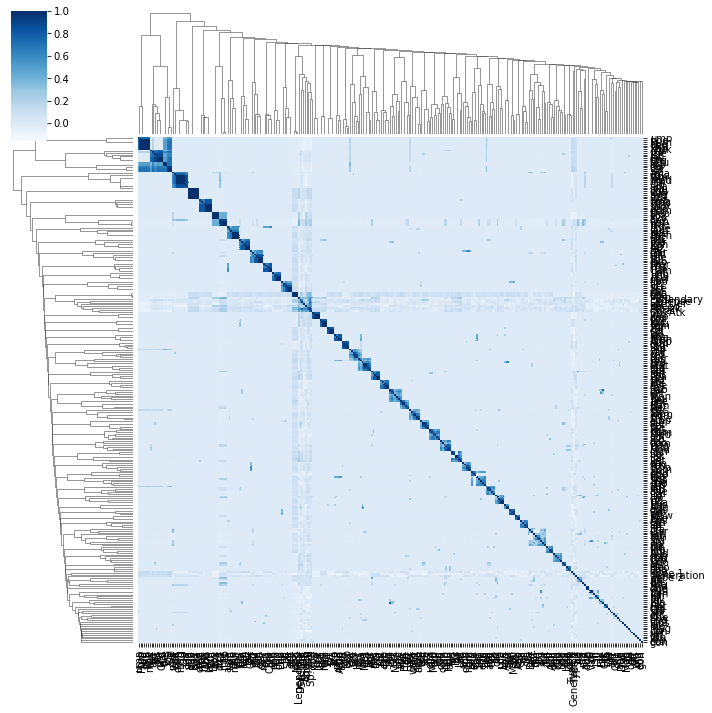

In [253]:
# calculate the correlation matrix
corr = poke_df_proc.corr()

# plot the heatmap
g = sns.clustermap(corr, 
                   xticklabels=corr.columns,
                   yticklabels=corr.columns,
                   cmap='Blues'
                  )
from matplotlib.patches import Rectangle
ax = g.ax_heatmap

# ax.add_patch(Rectangle(
#     (np.flatnonzero(g.data2d.index == 'Type 1'), np.flatnonzero(g.data2d.index == 'Type 1')
#     ), -10, 1, fill=False, edgecolor='red', lw=0.5))
plt.show()
#sns.clustermap(poke_df_rm_proc,cmap='Blues')

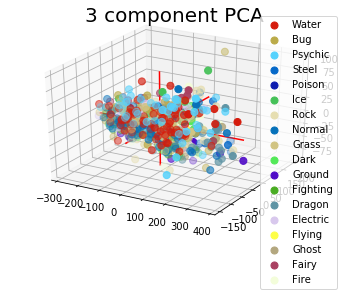

In [254]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(poke_df_proc)
principalDf = pd.DataFrame(data = principalComponents
                           ,columns = ['PC1', 'PC2','PC3']
                          )

finalDf = pd.concat([principalDf, poke_df['Type 1'].reset_index(drop=True)], axis = 1)

len(set(finalDf['Type 1']))
import random

number_of_colors = len(set(finalDf['Type 1']))

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

#fig = matplotlib.pyplot.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = set(finalDf['Type 1'])
#colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type 1'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# make simple, bare axis lines through space:
xAxisLine = ((min(finalDf['PC1']), max(finalDf['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(finalDf['PC2']), max(finalDf['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(finalDf['PC3']), max(finalDf['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

### PCA plot doesn't show clear separation of the classes
### Would normally try t-SNE, but due to time constraints,
### I don't want to worry about the tuning required for that approach

In [255]:
### Split data into feature and outcome set
# X -> features, y -> outcome
X = poke_df_proc.drop('Type 1',axis=1)
y = poke_df_proc['Type 1']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.3) 

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
## Attempt at oversampling to potentially help performance on held out test set
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority',k_neighbors=2) #SMOTE('minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_train.shape,y_train.shape)
print(X_sm.shape,y_train.shape)

(443, 276) (443,)
(501, 276) (443,)


## Models:
Attempted logistic regression, decision tree, random forest, SVM, XGBoost, simple MLP

things to try in future:
- incremental feature contribution
- tpot for automated machine learning
- autokeras for automated deep learning
- evolutionary algorithm (also for hyperparameter tuning)

### Logistic regression
training a LogisticRegression

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

5-fold CV: Logistic Regression mean and std scores are: (0.336, 0.037)
Accuracy of random search on test set: 0.330


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


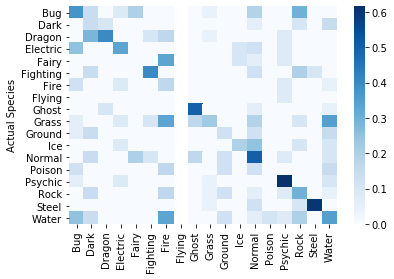

In [257]:
from sklearn.linear_model import LogisticRegression
## 5-fold CV scores
lr = LogisticRegression(random_state=RANDOM_STATE)
lr_scores = cross_val_score(lr, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Logistic Regression mean and std scores are: (%.3f, %.3f)"%(lr_scores.mean(), lr_scores.std()))

## Training/Testing split accuracy
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_fit = lr_model.fit(X_train, y_train) 
lr_predictions = lr_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(lr_predictions)

lr_score = lr_model.score(X_test,y_test)
print("Accuracy of random search on test set: %.3f"%(lr_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

Training a LogisticRegression model as Baseline with oversampling lowest frequent class

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

5-fold CV: Logistic Regression mean and std scores are: (0.415, 0.029)
Accuracy of logistic regression on test set: 0.314


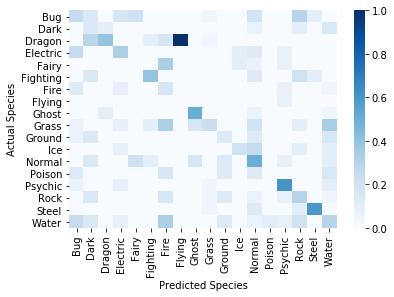

In [258]:
from sklearn.linear_model import LogisticRegression
## 5-fold CV scores
lr = LogisticRegression(random_state=RANDOM_STATE)
lr_scores = cross_val_score(lr, X=X_sm, y=y_sm, cv=5, scoring="f1_weighted")
print("5-fold CV: Logistic Regression mean and std scores are: (%.3f, %.3f)"%(lr_scores.mean(), lr_scores.std()))

## training/Testing split accuracy
lr_model = LogisticRegression(random_state=RANDOM_STATE)
lr_fit = lr_model.fit(X_sm, y_sm) 
lr_predictions = lr_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(lr_predictions)

lr_oversmple_score = lr_model.score(X_test,y_test)
print("Accuracy of logistic regression on test set: %.3f"%(lr_oversmple_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### Oversampling seems to reduce accuracy on test set with logistic regression, so sticking with normal data set

### Decision Tree

5-fold CV: Decision Tree mean and std scores are: (0.164, 0.026)
Accuracy of decision tree on test set: 0.141


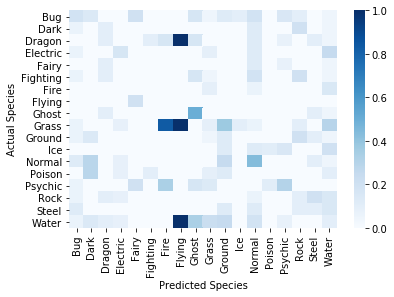

In [259]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
### 5-fold cv f1 score
dt = DecisionTreeClassifier(max_depth = 1000,random_state=RANDOM_STATE)
dt_scores = cross_val_score(dt, X=X_train, y=y_train, cv=3, scoring="f1_weighted")
print("5-fold CV: Decision Tree mean and std scores are: (%.3f, %.3f)"%(dt_scores.mean(), dt_scores.std()))

### Train-test split for confusion matrix
dtree_model = DecisionTreeClassifier(max_depth = 1000,random_state=RANDOM_STATE).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(dtree_predictions)

dt_score = dtree_model.score(X_test,y_test)
print("Accuracy of decision tree on test set: %.3f"%(dt_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### Random Forest:
Random Forest with manually specified parameters for max_depth and n_estimators

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Random Forest mean and std scores are: (0.316, 0.053)
Accuracy of Manual parameters on test set: 0.267


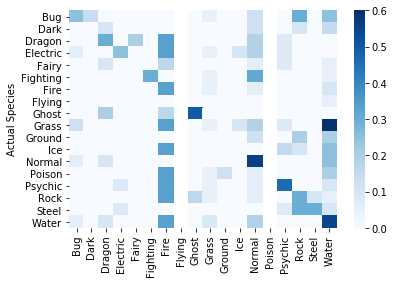

In [260]:
# training a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
## 5-fold CV scores
rf = RandomForestClassifier(max_depth = 100,n_estimators=1000,random_state=RANDOM_STATE)
rf_scores = cross_val_score(rf, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Random Forest mean and std scores are: (%.3f, %.3f)"%(rf_scores.mean(), rf_scores.std()))

## Training/Testing split accuracy
rf_model = RandomForestClassifier(max_depth = 100,n_estimators=1000,random_state=RANDOM_STATE)
rf_fit = rf_model.fit(X_train, y_train) 
rf_predictions = rf_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(rf_predictions)

rf_man_score = rf_model.score(X_test,y_test)
print("Accuracy of Manual parameters on test set: %.3f"%(rf_man_score))


conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

Random Search hyperparameter optimization since RF model seems to perform decently in comparison to base

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.4min finished


Accuracy of best random search hyperparameters on test set: 0.183


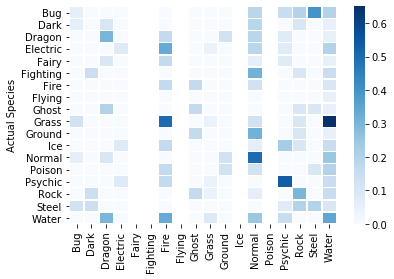

In [261]:
## inspired by https://pierpaolo28.github.io/blog/blog25/
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 5, verbose= 5, random_state=RANDOM_STATE, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
rf_rand_score = accuracy_score(y_test,predictionforest)
print("Accuracy of best random search hyperparameters on test set: %.3f"%(rf_rand_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

Grid Search hyperparameter optimization since RF model seems to perform decently in comparison to base

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  4.8min finished


Accuracy of best grid search hyperparameters on test set: 0.204


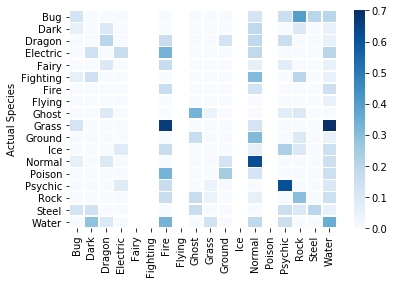

In [262]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, 
                     model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, 
                     model.best_params_['n_estimators'] + 150]
}

clf = RandomForestClassifier(random_state=RANDOM_STATE)
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)

model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
rf_grid_score = accuracy_score(y_test,predictionforest)
print("Accuracy of best grid search hyperparameters on test set: %.3f"%(rf_grid_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

### SVM linear kernel
default parameters

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Support Vector Machine mean and std scores are: (0.252, 0.020)
Accuracy of Support Vector Machine on test set: 0.283


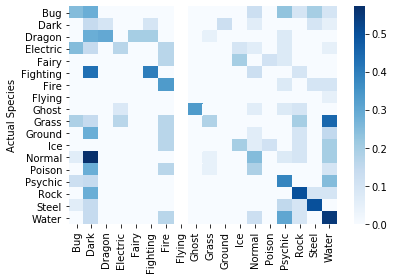

In [269]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear',random_state=RANDOM_STATE).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(svm_predictions)

svm = SVC(kernel = 'linear',random_state=RANDOM_STATE)
svm_scores = cross_val_score(svm, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Support Vector Machine mean and std scores are: (%.3f, %.3f)"%(svm_scores.mean(), svm_scores.std()))

# model accuracy for X_test   
svm_lin_score = svm_model_linear.score(X_test, y_test)
print("Accuracy of Support Vector Machine on test set: %.3f"%(svm_lin_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

random search hyperparameter optimization

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.7s finished


Accuracy of random search on test set: 0.309


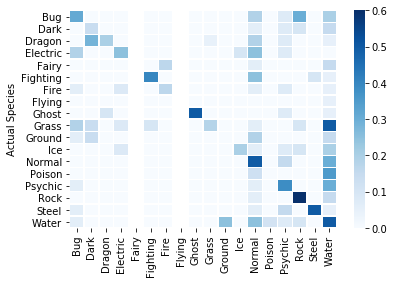

In [264]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

random_search = {
    'C': sp_rand(),
    'degree': sp_rand(),
    'kernel': ['rbf','linear']
}

clf = SVC()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 5, verbose= 5, random_state= RANDOM_STATE, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
svm_rand_score = accuracy_score(y_test,predictionforest)
print("Accuracy of random search on test set: %.3f"%(svm_rand_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

grid search hyperparameter optimization

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.4s finished


Accuracy of grid search on test set: 0.351


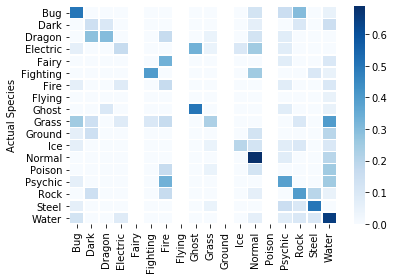

In [265]:
from sklearn.model_selection import GridSearchCV

grid_search = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']
              }


clf = SVC(RANDOM_STATE)
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)

model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
svm_grid_score = accuracy_score(y_test,predictionforest)
print("Accuracy of grid search on test set: %.3f"%(svm_grid_score))

## Confusion matrix on test set
y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(predictionforest)

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues',linewidths=.5)

### Simple Multi-Layer Perceptron

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Support Vector Machine mean and std scores are: (0.308, 0.012)
Accuracy of multi-layer perceptron on test set: 0.330


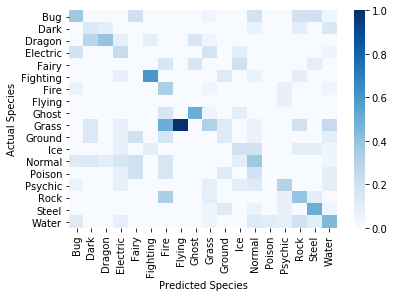

In [266]:
# training a simple Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
hid_layer = (200,100,50,100,200)
activ_func = 'tanh'
solver = 'lbfgs'
iter_n = 300
mlp_model = MLPClassifier(hidden_layer_sizes=hid_layer,
                          max_iter=iter_n,
                          activation = activ_func,
                          solver=solver,
                          random_state=RANDOM_STATE).fit(X_train, y_train) 
mlp_predictions = mlp_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(mlp_predictions)

mlp = MLPClassifier(hidden_layer_sizes=hid_layer,
                    max_iter=iter_n,
                    activation = activ_func,
                    solver=solver,
                    random_state=RANDOM_STATE)
mlp_scores = cross_val_score(mlp, X=X_train, y=y_train, cv=5, scoring="f1_weighted")
print("5-fold CV: Support Vector Machine mean and std scores are: (%.3f, %.3f)"%(mlp_scores.mean(), mlp_scores.std()))

# model accuracy for X_test   
mlp_score = mlp_model.score(X_test, y_test)
print("Accuracy of multi-layer perceptron on test set: %.3f"%(mlp_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

### XGB classifier

/Users/varunsharma/Desktop/To_Delete/testenv1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5-fold CV: Gradient Boosting mean and std scores are: (0.220, 0.048)
Accuracy of Gradient Boosting on test set: 0.209


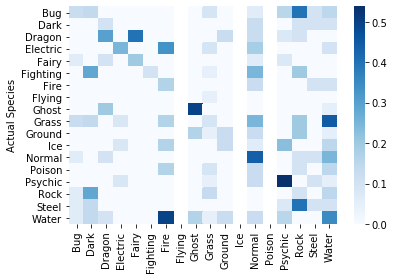

In [267]:
# training a simple XGB classifier
from xgboost import XGBClassifier ## after !pip install xgboost in jupyter notebook
xgb_model = XGBClassifier(random_state=RANDOM_STATE).fit(X_train, y_train) 
xgb_predictions = xgb_model.predict(X_test)

y_test_mapped = np.array(y_test.map({v: k for k, v in type1_map.items()}))
y_pred_mapped = np.vectorize({v: k for k, v in type1_map.items()}.get)(xgb_predictions)

xgb = XGBClassifier(random_state=RANDOM_STATE)
xgb_scores = cross_val_score(xgb, X=X_train, y=y_train, cv=5, scoring="f1_weighted")

print("5-fold CV: Gradient Boosting mean and std scores are: (%.3f, %.3f)"%(xgb_scores.mean(), xgb_scores.std()))

# model accuracy for X_test   
xgb_score = xgb_model.score(X_test, y_test)
print("Accuracy of Gradient Boosting on test set: %.3f"%(xgb_score))

conf_mat = pd.crosstab(y_test_mapped, y_pred_mapped, rownames=['Actual Species'], colnames=['Predicted Species'])
conf_mat_norm = conf_mat / conf_mat.astype(np.float).sum(axis=1)
sns.heatmap(conf_mat_norm,cmap='Blues')

## All test scores compared:

In [268]:
print('Logistic Regression- no oversampling: %.3f'%(lr_score))
print('Logistic Regression- oversampling: %.3f'%(lr_oversmple_score))
print('Decision tree- %.3f'%(dt_score))
print('Random Forest- manual: %.3f'%(rf_man_score))
print('Random Forest- random search: %.3f'%(rf_rand_score))
print('Random Forest- grid search: %.3f'%(rf_grid_score))
print('SVM- linear default: %.3f'%(svm_lin_score))
print('SVM- random search: %.3f'%(svm_rand_score))
print('SVM- grid search: %.3f'%(svm_grid_score))
print('Multi Layer Perceptron- manual: %.3f'%(mlp_score))
print('Gradient Boost- default: %.3f'%(xgb_score))

Logistic Regression- no oversampling: 0.330
Logistic Regression- oversampling: 0.314
Decision tree- 0.141
Random Forest- manual: 0.267
Random Forest- random search: 0.183
Random Forest- grid search: 0.204
SVM- linear default: 0.283
SVM- random search: 0.309
SVM- grid search: 0.351
Multi Layer Perceptron- manual: 0.330
Gradient Boost- default: 0.209


### As a result, it appears that the SVM- grid search algorithm performs the best, however Logistic regression performs very well for the feature engineered data set. Additionally, MLP performs quite well without any hyperparameter tuning.

Note: I think I might have implemented the grid search or random search algorithms not as effectively for the Random Forest algorithms as we see reduced performance for the grid/random/bayesian optimization search algorithms